In [6]:
# Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [7]:
# Leemos la data (lo siento si no la subi!!)
website = pd.read_csv('website.csv')

# Vemos primeras lineas del dataset
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


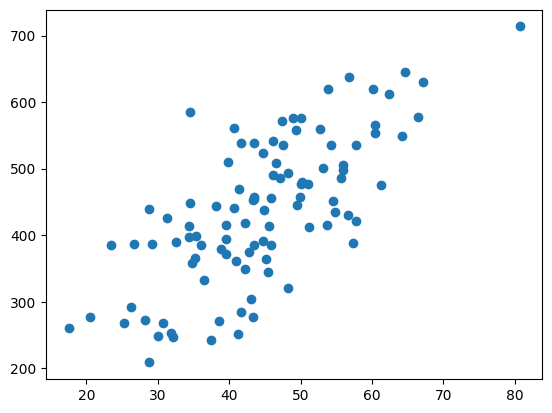

<Figure size 640x480 with 0 Axes>

In [8]:
#Scatter plot de time vs age para ver si existe alguna relacion
plt.scatter(website.age, website.time_seconds)

plt.show()
plt.clf()

In [9]:
# Creamos una regresion lineal para  predecir los time_seconds basado en age

model = sm.OLS.from_formula('time_seconds ~ age + browser',website)
results = model.fit()
print(results.params)
print(results.summary())


Intercept            194.445569
browser[T.Safari]    -60.709766
age                    6.166804
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           time_seconds   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     67.12
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           5.03e-19
Time:                        15:12:31   Log-Likelihood:                -567.36
No. Observations:                 100   AIC:                             1141.
Df Residuals:                      97   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------

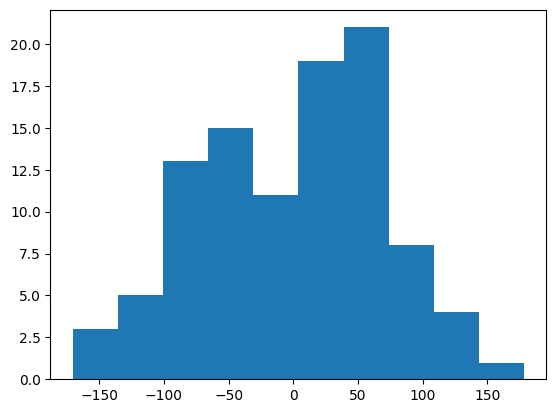

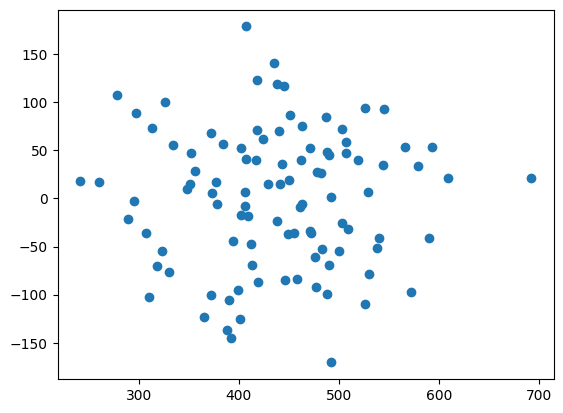

<Figure size 640x480 with 0 Axes>

In [10]:
# Calculando valores ajustados

fitted_values = results.predict(website)

# Calculando residuales

residuals = website.time_seconds - fitted_values

# Chequeando normalidad

plt.hist(residuals)

plt.show()
plt.clf()

# Chequeando homoscedasticidad

plt.scatter(fitted_values, residuals)

plt.show()
plt.clf()

In [11]:
# Predecimos cantidad de tiempo para una persona de 40 años

print(results.predict({"age":40,"browser":"Safari"}))

0    380.407949
dtype: float64
